# IMPORTS & CONFIGS 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
from scipy import signal
from scipy.stats import norm
from scipy.optimize import curve_fit
import re

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Lucas\Documents\GitHub\fourrier-analysis-of-weather-data\src\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Lucas\AppData\Local\Temp\ipykernel_19004\4174361653.py", line 1, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Lucas\Documents\GitHub\fourrier-analysis-of-weather-data\src\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Lucas\Documents\GitHub\fourrier-analysis-of-weather-data\src\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
  File "c:\Users\Lucas\Documents\GitHub\f

# DATA PROCESSING FUNCTIONS

In [ ]:
def data_start(dir: str) -> object:
    df = pd.read_csv(dir, sep=';',decimal='.', index_col=False, skiprows=10, usecols=range(4), encoding='iso-8859-1')
    df['datetime'] = pd.to_datetime(df.iloc[:, 0])
    # Drop the original date and time columns by index
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.replace(-9999, np.nan, inplace=True)
    df = df.dropna()
    
    df['year_month'] = df['datetime'].dt.to_period('M')
    df.drop(df.columns[[-2]], axis=1, inplace=True)
    target_columns = ['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)', 'TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)']

    df[target_columns] = df[target_columns].map(
        lambda x: re.sub(r'^\.(\d+)', r'0.\1', x) if isinstance(x, str) else x
    ).astype(float)
    
    monthly_avg = df.groupby('year_month').mean(numeric_only=True)
    monthly_avg.reset_index(inplace=True)

    del df
    monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp() 
    return monthly_avg.sort_values("year_month")

In [ ]:
def plot(df: object) -> None:
    plt.figure(figsize=(10, 5))

    # Plot the 'x' column
    for i in df.columns:
        if i != 'year_month':
            plt.plot(df['year_month'], df[i], linestyle='-', label=i)  

    # Adding titles and labels
    plt.title('Data x Months')
    plt.xlabel('DATA')
    plt.ylabel('YEAR_MOUNTH')

    # Adding a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

In [ ]:
def plot_fft(data, column_name):
    n = len(data)
    # Compute the FFT
    fft_values = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n)
    
    # Only take the positive frequencies
    fft_values = fft_values[:n//2]
    fft_freq = fft_freq[:n//2]
    
    # Plot the FFT
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freq, np.abs(fft_values))
    plt.title(f'FFT of {column_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

In [ ]:
def fft_process(dataframes):
    for i, df in dataframes.items():
        print(f"Processing DataFrame {i}/{len(dataframes)}")
        for column in df.columns:
            if column == 'year_month':
                continue
            print(f"Plotting FFT for column: {column} from {i}")
            print(df[column].head())
            plot_fft(df[column].drop(index=0).values, column)

In [ ]:
def apply_convolution(x, window):
    window = len(x)/10
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered

# MAIN

Processing DataFrame dados_A001_D_2000-05-06_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A001_D_2000-05-06_2024-05-26
0    0.000000
1    0.000000
2    0.006452
3    1.696774
4    2.083333
Name: PRECIPITACAO TOTAL, DIARIO (AUT)(mm), dtype: float64


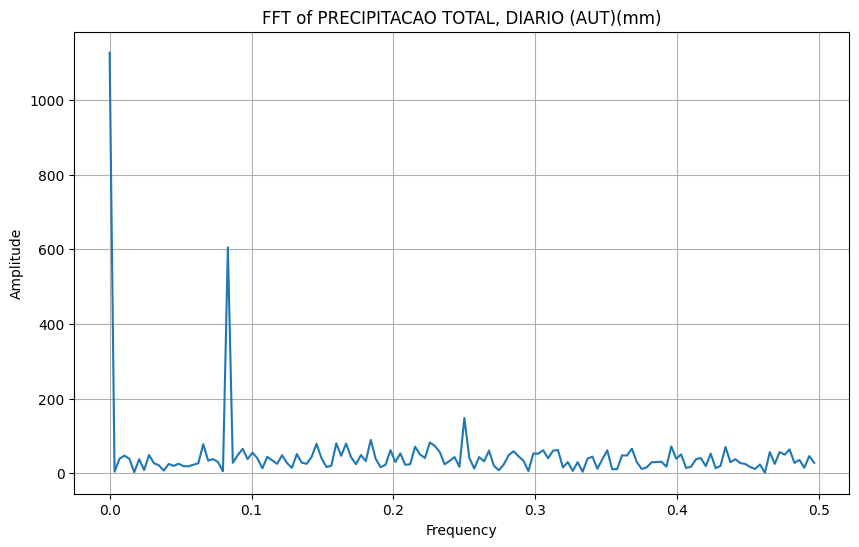

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A001_D_2000-05-06_2024-05-26
0    20.157895
1    19.264286
2    19.109677
3    21.483871
4    21.545833
Name: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C), dtype: float64


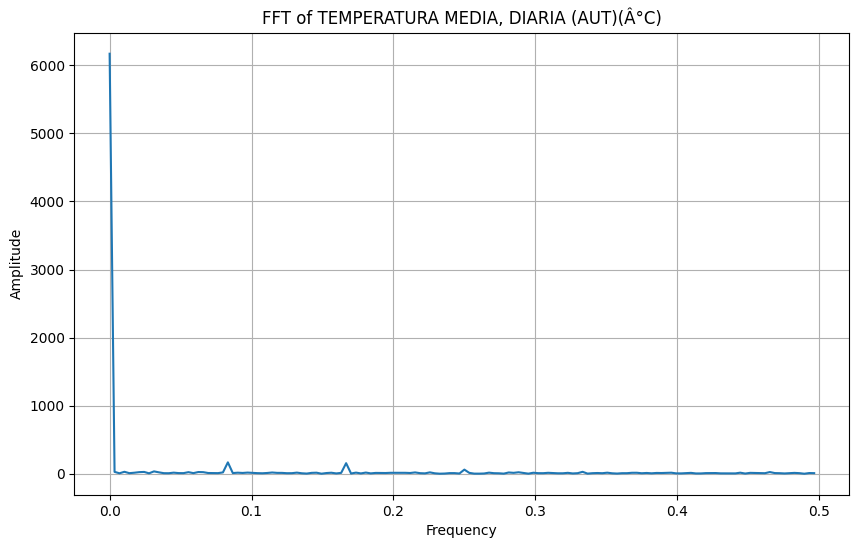

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A001_D_2000-05-06_2024-05-26
0    59.821053
1    57.221429
2    57.180645
3    46.583871
4    60.991667
Name: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%), dtype: float64


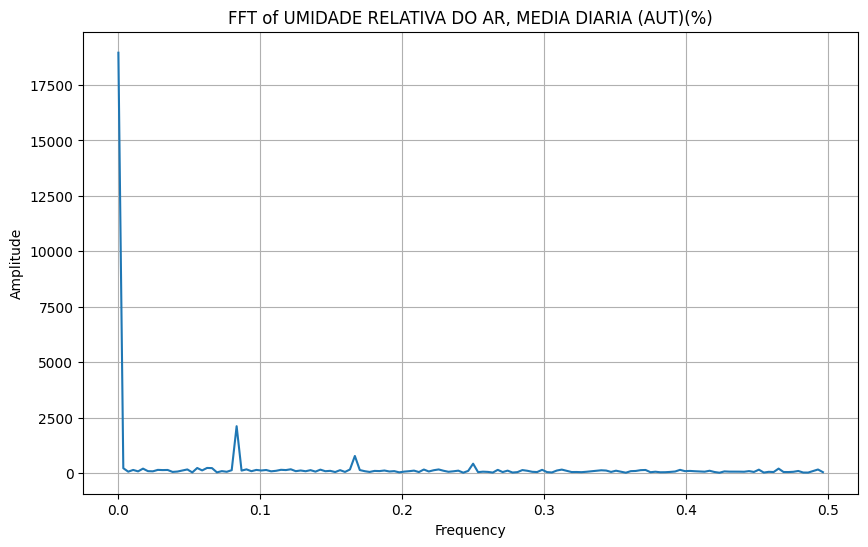

Processing DataFrame dados_A008_D_2003-06-12_2013-02-19/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A008_D_2003-06-12_2013-02-19
0    0.000000
1    0.812903
2    1.156522
3    0.366667
4    1.993103
Name: PRECIPITACAO TOTAL, DIARIO (AUT)(mm), dtype: float64


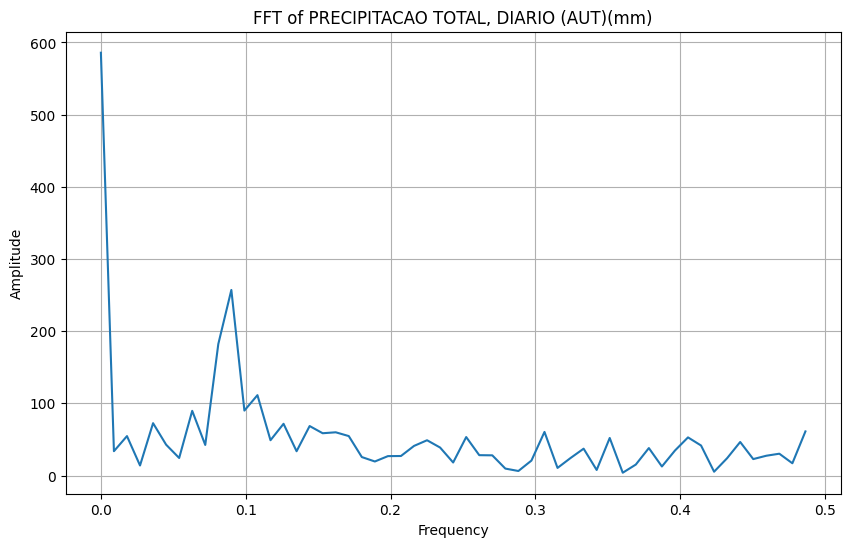

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A008_D_2003-06-12_2013-02-19
0    19.730769
1    19.283871
2    21.039130
3    22.720000
4    22.555172
Name: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C), dtype: float64


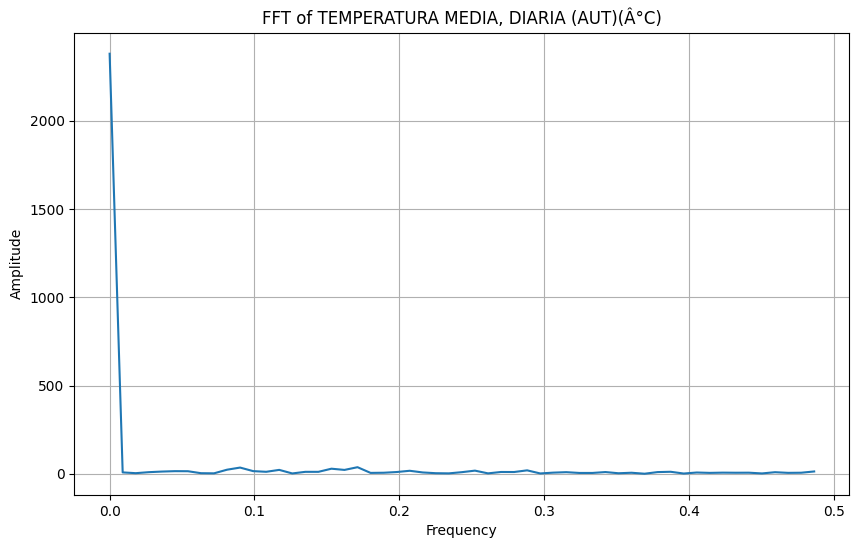

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A008_D_2003-06-12_2013-02-19
0    46.669231
1    50.132258
2    51.813043
3    51.596667
4    59.010345
Name: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%), dtype: float64


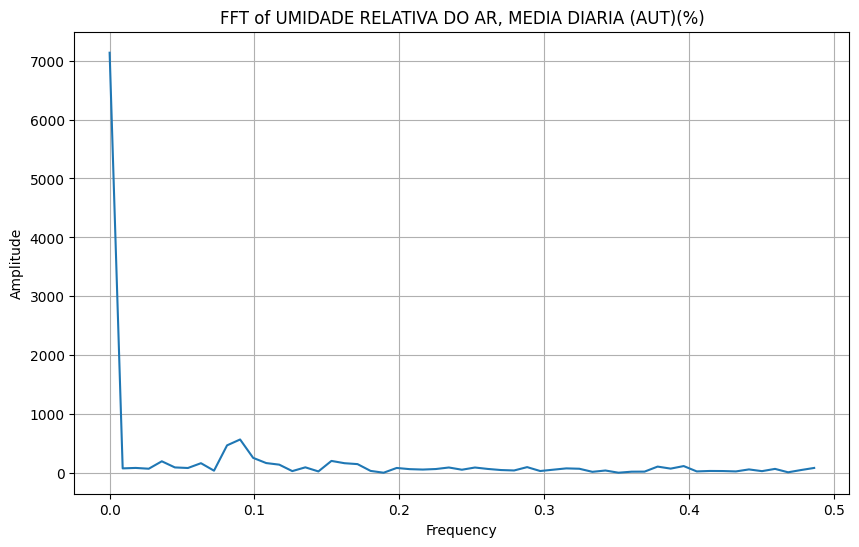

Processing DataFrame dados_A042_D_2017-07-18_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A042_D_2017-07-18_2024-05-26
0     0.000000
1     0.000000
2     0.166667
3     0.916129
4    10.671429
Name: PRECIPITACAO TOTAL, DIARIO (AUT)(mm), dtype: float64


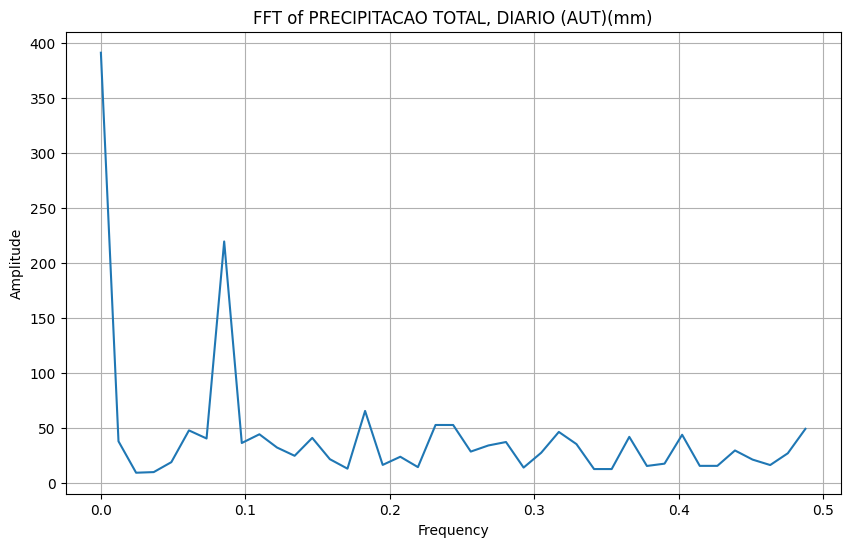

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A042_D_2017-07-18_2024-05-26
0    18.427273
1    22.835714
2    22.645833
3    25.222581
4    21.721429
Name: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C), dtype: float64


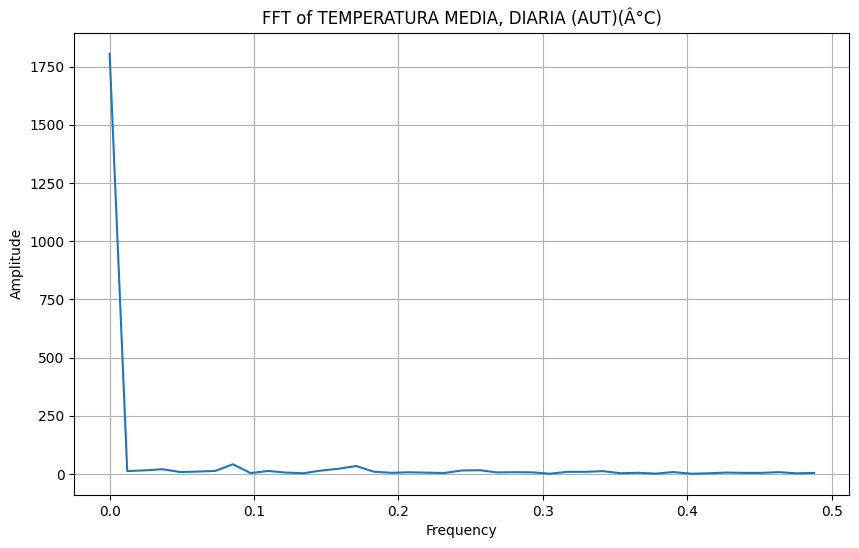

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A042_D_2017-07-18_2024-05-26
0    48.145455
1    36.075000
2    40.358333
3    42.035484
4    76.696429
Name: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%), dtype: float64


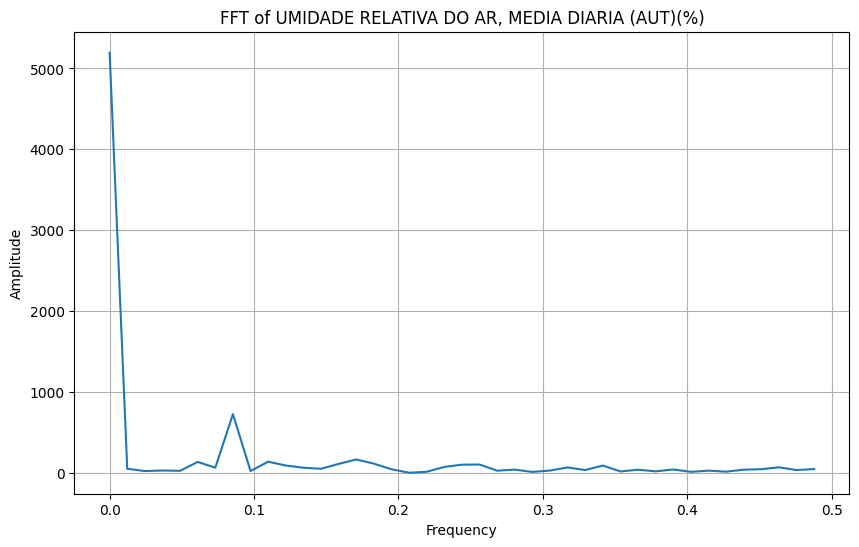

Processing DataFrame dados_A045_D_2008-10-02_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A045_D_2008-10-02_2024-05-26
0    0.192000
1    7.160000
2    6.309677
3    6.645161
4    5.700000
Name: PRECIPITACAO TOTAL, DIARIO (AUT)(mm), dtype: float64


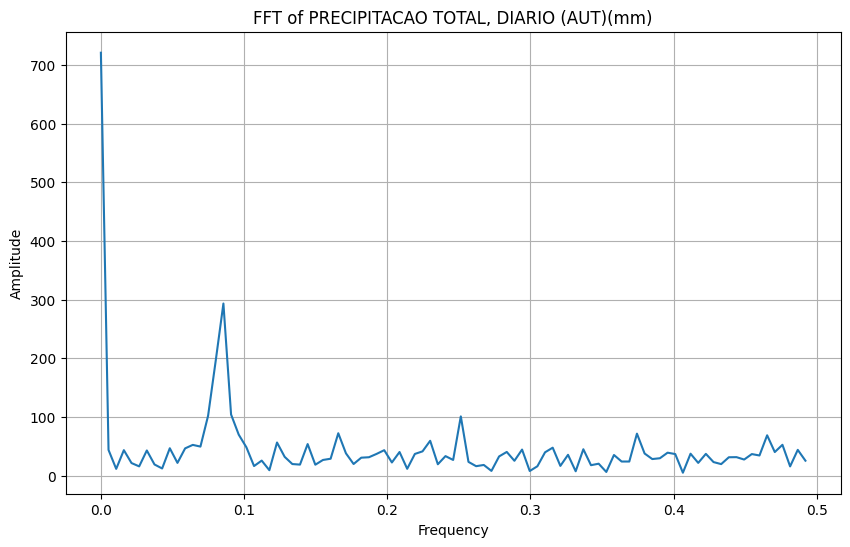

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A045_D_2008-10-02_2024-05-26
0    23.612000
1    21.660000
2    21.241935
3    21.748387
4    21.764286
Name: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C), dtype: float64


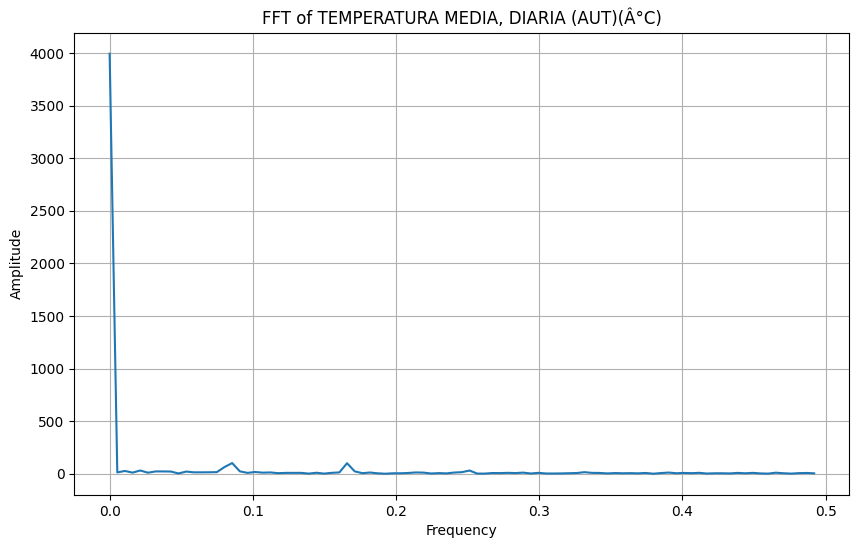

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A045_D_2008-10-02_2024-05-26
0    50.948000
1    76.626667
2    82.103226
3    79.880645
4    78.275000
Name: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%), dtype: float64


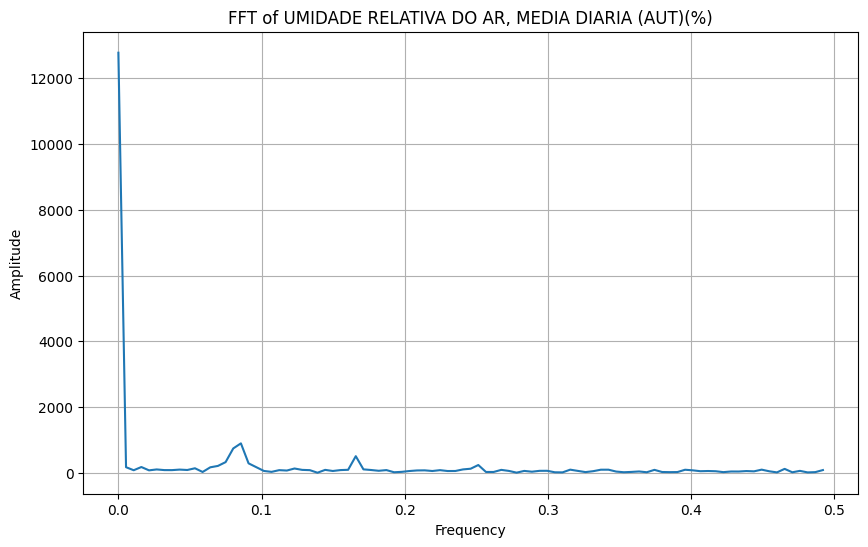

Processing DataFrame dados_A046_D_2014-09-30_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A046_D_2014-09-30_2024-05-26
0    3.222222
1    8.060000
2    8.877419
3    2.458065
4    4.600000
Name: PRECIPITACAO TOTAL, DIARIO (AUT)(mm), dtype: float64


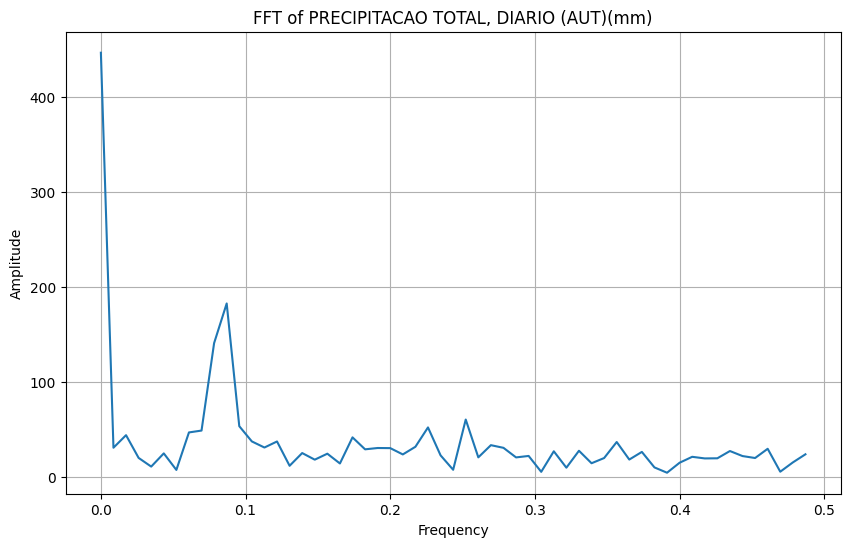

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A046_D_2014-09-30_2024-05-26
0    24.466667
1    22.536667
2    21.900000
3    23.290323
4    22.414286
Name: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C), dtype: float64


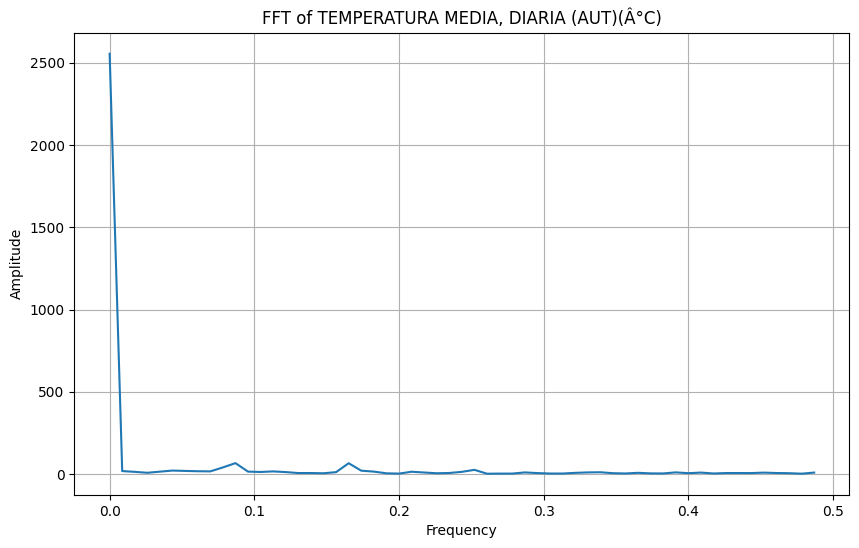

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A046_D_2014-09-30_2024-05-26
0    55.033333
1    74.473333
2    76.529032
3    65.961290
4    72.492857
Name: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%), dtype: float64


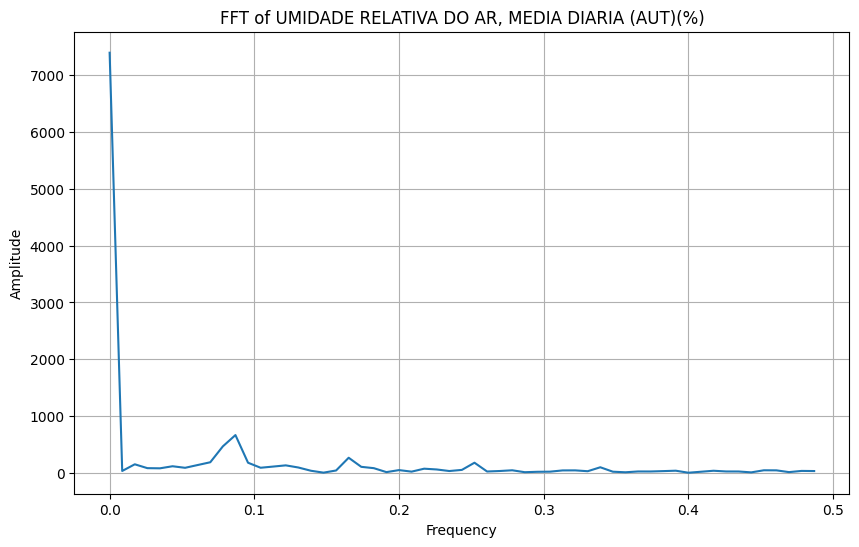

Processing DataFrame dados_A047_D_2017-02-06_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A047_D_2017-02-06_2024-05-26
0    11.387500
1     4.387097
2     0.326667
3     0.561290
4     0.000000
Name: PRECIPITACAO TOTAL, DIARIO (AUT)(mm), dtype: float64


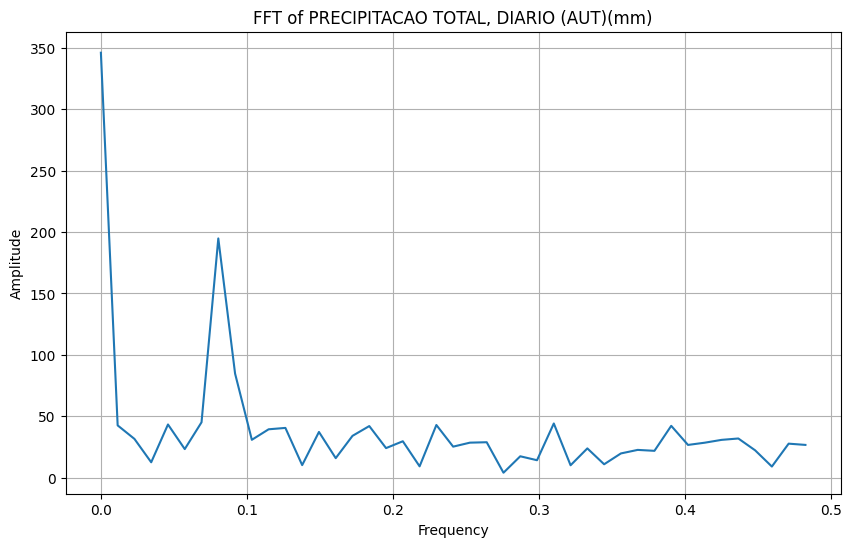

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A047_D_2017-02-06_2024-05-26
0    21.450000
1    22.558065
2    22.346667
3    20.812903
4    19.607143
Name: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C), dtype: float64


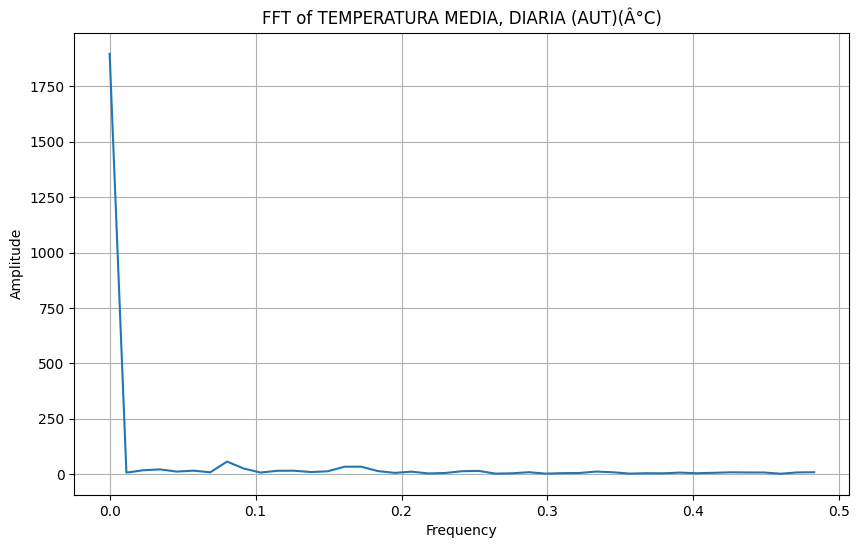

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A047_D_2017-02-06_2024-05-26
0    79.018750
1    75.451613
2    74.393333
3    73.151613
4    63.689286
Name: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%), dtype: float64


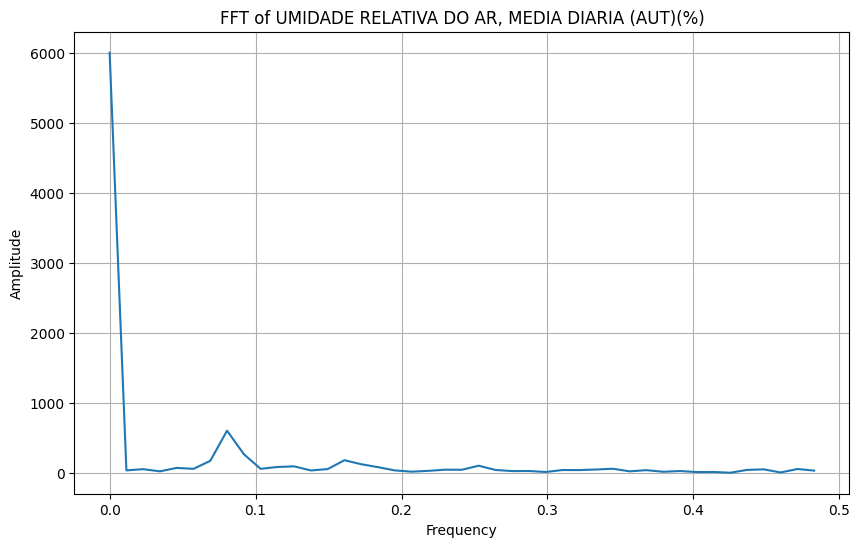

In [ ]:
data_dir = "../Data/Auto"
filepaths = glob.glob(os.path.join(data_dir, "*.csv"))
stations = {}
for file in filepaths: 
    # if 'A008' in file: #SKIP A008 STATION BE COUSE ARE NOT IN OPPERATION SINCE 2013
    #     continue 
    stations[file.replace('../Data/Auto\\', '').replace('.csv', '')] = data_start(file)
    
# for key, value in stations.items():
    # print(key)
    # display(value)
    # plot(value)

fft_process(stations)

In [ ]:
def BN(L, n, j):
    somatorio = 0
    for i in range(1, 2*L):
        somatorio += f(i)*np.sin((n*np.pi*j)/L)
    return 1/L * somatorio


BN(8)